## Linear Regression:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Reading the dateset:

data = pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.drop("Unnamed: 0",axis = 1,inplace = True)  ### dropped first column

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [8]:
### Collecting X and Y:
X = data['TV'].values
X.shape

(200,)

In [9]:
Y = data["Sales"].values
Y.shape

(200,)

### y = b1x+b0  --- slope of the line.

### b1 = ∑(x - (mean of x)(y - (mean of y))/∑(x - (mean of x))^2.

### b0 = mean_y -(b1*mean_x)

In [10]:
### calculating mean of X and Y

mean_x =np.mean(X)
print(mean_x)
mean_y = np.mean(Y)
print(mean_y)

147.0425
14.0225


In [12]:
n = len(X)
numer = 0
denom = 0
for i in range(n):
    numer+=((X[i]-mean_x)*(Y[i]-mean_y))
    denom += ((X[i]-mean_x))**2
b1 = numer/denom
b0 = mean_y -(b1 *mean_x)

print(b1)
print(b0)


0.04753664043301969
7.032593549127704


In [13]:
print("The linear model is : Y = {:.5}+{:.4}X".format(b0,b1))

The linear model is : Y = 7.0326+0.04754X


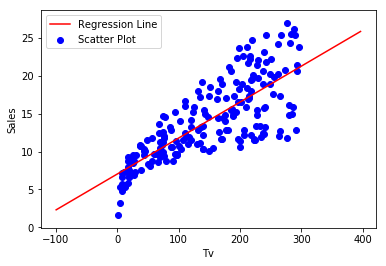

In [14]:
## plotting values and regression line:
max_x = np.max(X) +100
min_x = np.min(X) - 100

## calculating line values x and y:

x = np.linspace(min_x,max_x,500)
y = b0 + b1*x

## plotting line:

plt.plot(x,y,color = "red",label = "Regression Line")
plt.scatter(X,Y,c = "Blue",label = "Scatter Plot")
plt.xlabel("Tv")
plt.ylabel("Sales")
plt.legend(loc = "best")
plt.show()

R-squared value = ∑(ypredicted - mean of y )^2/ ∑(y - mean of y)^2.

In [15]:
y_pred = b0 + b1*X[2]
print(y_pred)

7.8502237645756425


In [17]:
### calculating the R^2 Score:

nm = 0
dm = 0
for i in range(n):
    y_pred = b0 + b1*X[i]
    dm +=(Y[i]-mean_y)**2
    nm += (Y[i]-y_pred)**2
r2 = 1-(nm/dm)
print("R2 score")
print(r2)


R2 score
0.6118750508500708


In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
### collecting the data:

X = data["TV"].values.reshape(-1,1)
Y = data["Sales"].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

0.047536640433019764
7.032593549127693


In [22]:
print("The linear Model is :Y = {:.5}+{:.4}X".format(reg.intercept_[0],reg.coef_[0][0]))

The linear Model is :Y = 7.0326+0.04754X


In [23]:
predictions = reg.predict(X)
predictions

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

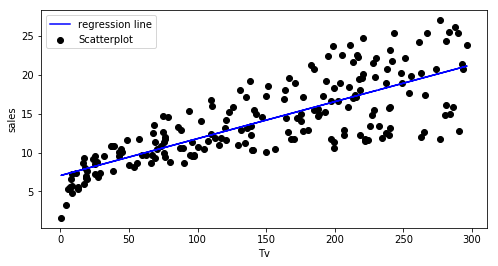

In [27]:
plt.figure(figsize = (8,4))
plt.scatter(data['TV'],data['Sales'],color = 'black',label = "Scatterplot")
plt.plot(data['TV'],predictions,c = 'blue',label = "regression line")
plt.xlabel("Tv")
plt.ylabel("sales")
plt.legend(loc = "best")
plt.show()

In [28]:
## r2 score:

r2 = reg.score(X,Y)
print("R2 Score :",r2)

R2 Score : 0.611875050850071


In [31]:
predictions = reg.predict([[17.2]])
predictions

array([[7.85022376]])